# Capstone Sponsor Deliverable
# Empirical Study on the Directors in US-Issued Companies


#### Fatima Nurmakhamadova - Group 7
#### College of Professional Studies, Northeastern University
#### ALY6980.70447: Capstone
#### Dr. Roy Wada
#### December 18, 2022

This file represents the individual contribution of Fatima Nurmakhamadova toward the final project of Group 7. 

It includes Predictive Modeling Part 1 - Building predictive models using the Auto ML technique. For this, you will need the <4. Processed_Data_5.csv> file that was generated at the end of the Data processing in the previous code file <2. Data Processing.ipynb>, or use already exported file <4. Processed_Data_5.csv> attached to this submission .  

# Introduction to AutoML using PyCaret

Adopted from 
https://medium.com/geekculture/introduction-to-automl-using-pycaret-3c9d4f83aaae


## AutoML
Once upon a time, Automatically trained Machine Learning models are Data Scientist’s dream. The typical job of a Data Scientist would be to Identify — Understand — Acquire — Analyze — Prepare — Train — Evaluate — Convey. But most of their time will be spent just on Preparing, Training and Evaluating phases alone. Sometimes it can be an endless while loop!

As more and more businesses turned towards Machine Learning to solve their key problems, Data Scientists were expected to deliver results in a shorter span of time. This has created a demand to automate the key steps in a Data Science project so that, Data Scientists can focus on actual problem than on writing hundreds of lines of code to find the best model. Then came the buzzword, talk of the town AutoML(Automated Machine Learning).

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## What you will need to run the code

In order to run this code, we are going to first install Auto-sklearn using pip. For more instructions on how to install Auto-sklearn, for example using conda, please check [this](https://automl.github.io/auto-sklearn/master/installation.html).

**Install following packages if necessary (in terminal)**




In [ ]:
#pip install auto-sklearn
#conda install gxx_linux-64 gcc_linux-64 swig
#install numpy==1.21
#pip install numba==0.54
#python -c "import numba"

**Setup tools: Check if the libraries meet the requirements**

In [ ]:
'''
#1. numpy >=1.9.0
#import numpy
print('The numpy version is {}.'.format(numpy.__version__))

#2. scipy >=0.14.1
#import scipy
print('The scipy version is {}.'.format(scipy.__version__))

#3. scikit-learn >=0.22.0, <0.23
#import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

#4. pandas <1
#import pandas
print('The pandas version is {}.'.format(pandas.__version__))

#5.ConfigSpace >=0.4.14, <0.5
#6.pynisher >=0.4.2
#7.pyrfr >=0.7, <0.9
#8.smac >=0.13, <0.14

#Try to run in terminal if the code is not working
#!pip install pandas==1
#pip install sklearn==0.23.2
'''

 **Next, install Pycaret Library?**


In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.1 MB/s 
     |████████████████████████████████| 325 kB 44.7 MB/s 
     |████████████████████████████████| 3.3 MB 40.6 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 167 kB 57.0 MB/s 
     |████████████████████████████████| 1.3 MB 40.2 MB/s 
     |████████████████████████████████| 147 kB 59.6 MB/s 
     |████████████████████████████████| 5.0 MB 8.7 MB/s 
     |████████████████████████████████| 1.7 MB 36.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 69.0 MB/s 
     |████████████████████████████████| 662 kB 73.1 MB/s 
     |████████████████████████████████| 25.8 MB 1.3 MB/s 
     |████████████████████████████████| 

In [16]:
import pandas as pd

#Upload <Processed_Data_5.csv> from your local drive by choosing file. 
#"target" is the target variable
from google.colab import files
uploaded = files.upload()

Saving Processed_Data_5.csv to Processed_Data_5 (1).csv


## Data Preparation 

In [17]:
#Store Dataset in a Pandas Dataframe
import io
df= pd.read_csv(io.BytesIO(uploaded['Processed_Data_5.csv']))

df.head(10)

,target,ISSUERID,INDIVIDUAL_ID,DepartTime,AGE,Tenure,DirectorshipCount,AVG_IPS,MED_IPS,AVG_Weighted_Connection,...,ISSUER_CNTRY_DOMICILE,CONTROLLED_VIA_STOCK_PYRAMID,HAS_CORPORATE_PARENT,OWNERSHIP_CATEGORY,IVY_indicator,Avg_3rd_connect_17_22,Ttl_controv_17_22,CEO_leav,Chairman_leav,Lead_D_leav
0,0,IID000000002123703,88176,0,67,0,1,7.98,7.98,0.45,...,US,No,No,Widely Held,False,6,3,F,F,F
1,0,IID000000002123703,139570,0,62,0,3,5.85,5.85,0.43,...,US,No,No,Widely Held,UNKNOWN,8,3,F,F,F
2,0,IID000000002123703,22405,0,67,0,5,5.32,5.32,0.44,...,US,No,No,Widely Held,False,6,3,F,F,F
3,0,IID000000002123703,178049,0,67,0,4,8.77,8.77,0.46,...,US,No,No,Widely Held,False,8,3,F,F,F
4,0,IID000000002123703,685844,0,56,1,1,5.72,5.88,0.00,...,US,No,No,Widely Held,UNKNOWN,0,3,F,F,F
5,0,IID000000002123703,35281,0,57,2,3,9.21,9.64,1.41,...,US,No,No,Widely Held,False,3,3,F,F,F
6,0,IID000000002123703,538604,0,46,5,2,5.90,5.73,4.07,...,US,No,No,Widely Held,UNKNOWN,1,3,F,F,F
7,0,IID000000002123703,555712,0,57,5,1,5.68,6.89,3.40,...,US,No,No,Widely Held,UNKNOWN,0,3,F,F,F
8,0,IID000000002123703,233998,0,60,8,1,2.65,3.12,4.72,...,US,No,No,Widely Held,False,0,3,F,F,F
9,0,IID000000002123703,103968,0,68,11,2,10.46,10.79,5.12,...,US,No,No,Widely Held,False,3,3,F,F,F


In [5]:
#Remove unnecessary columns before modeling
df = df.drop(columns=['ISSUERID', 'INDIVIDUAL_ID','DepartTime', 'MED_IPS','MED_Weighted_Connection',
                      'OWNERSHIP_CATEGORY','education','Directorship_Level','Directorship_Level_4',
                      'Sector','ISSUER_CNTRY_DOMICILE',])

#Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   target                                4155 non-null   int64  
 1   AGE                                   4155 non-null   int64  
 2   Tenure                                4155 non-null   int64  
 3   DirectorshipCount                     4155 non-null   int64  
 4   AVG_IPS                               4155 non-null   float64
 5   AVG_Weighted_Connection               4155 non-null   float64
 6   DOMINANT_SHAREHOLDER_PCT              4155 non-null   float64
 7   INSIDERS_OFFICERS_DIRECTORS_HELD_PCT  4155 non-null   float64
 8   PRINCIPAL_SHAREHOLDER_PCT             4155 non-null   float64
 9   CONTROLLING_SHAREHOLDER_PCT           4155 non-null   float64
 10  GENDER                                4155 non-null   object 
 11  COMPANY_FOUNDER  

In [6]:
#Convert target from int to categorical
df['target'] = df['target'].astype('category')

#Check the updates
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4155 entries, 0 to 4154
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   target                                4155 non-null   category
 1   AGE                                   4155 non-null   int64   
 2   Tenure                                4155 non-null   int64   
 3   DirectorshipCount                     4155 non-null   int64   
 4   AVG_IPS                               4155 non-null   float64 
 5   AVG_Weighted_Connection               4155 non-null   float64 
 6   DOMINANT_SHAREHOLDER_PCT              4155 non-null   float64 
 7   INSIDERS_OFFICERS_DIRECTORS_HELD_PCT  4155 non-null   float64 
 8   PRINCIPAL_SHAREHOLDER_PCT             4155 non-null   float64 
 9   CONTROLLING_SHAREHOLDER_PCT           4155 non-null   float64 
 10  GENDER                                4155 non-null   object  
 11  COMP

Text(0, 0.5, 'Number of Directors')

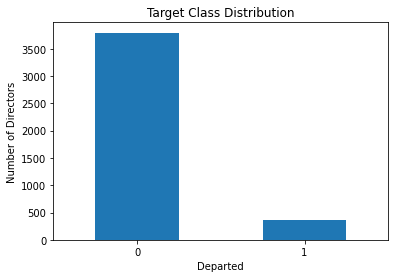

In [7]:
#Target class distribution
import matplotlib.pyplot as plt

figsize = (15, 10)
target_imbalance = df['target'].value_counts().plot(kind='bar')
    
plt.xticks(rotation=0)
# giving title for the graph
target_imbalance.set_title('Target Class Distribution')
# giving X and Y labels
plt.xlabel("Departed")
plt.ylabel("Number of Directors")

In [8]:
df['target'].value_counts()

0    3794
1     361
Name: target, dtype: int64

In order to demonstrate the predict_model() function on unseen data, a sample of 10% has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 415 records were not available at the time when the machine learning experiment was performed.

In [9]:
# Check for the shape of the dataset
print('Shape of the original dataset: ', df.shape)

# Initialize seed for random generators
seed = 786

# Create the data set using pandas sampling - seen data set
data = df.sample(frac=.90, random_state=seed) # %90 of the original dataset
data.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))

# Using samples not available in data as future or unseen data set
data_unseen = df.drop(data.index)  # %10 of the original dataset
data_unseen.reset_index(inplace=True, drop=True) 
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Shape of the original dataset:  (4155, 31)
Data for Modeling: (3740, 31)
Unseen Data For Predictions: (415, 31)


## Predictive Models - Part 1: Auto ML

In [11]:
# Doing some magic!
from pycaret.classification import *

#PLEASE RUN THiS LINE OF CODE IN TERMINAL IF IT ASKS FOR NUMPY >1.20
#install numpy==1.20 
#and run this cell again

*To set specific parameters please refer to this website https://pycaret.readthedocs.io/en/latest/api/classification.html*

In [ ]:
#Install if error
'''
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
#Install 7zip reader libarchive https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
#Install GraphViz & PyDot https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot
# Install cartopy(http://scitools.org.uk/cartopy/docs/latest/)
!pip install cartopy
import cartopy
'''

Once you execute this in your notebook we will be prompted to specify whether the detected column data types are correct or not. Press **Enter** to confirm and PyCaret will display the following set of information.

**Setting up Environment in PyCaret**

**Setup Parameters Explanation:**


*   **session_id:** int, default = None - Controls the randomness of experiment. It is equivalent to ‘random_state’ in scikit-learn. When None, a pseudo random number is generated. This can be used for later reproducibility of the entire experiment.
*   **train_size:** float, default = 0.7
*   **numeric_features:** list of str, default = None = If the inferred data types are not correct, the numeric_features param can be used to define the data types. It takes a list of strings with column names that are numeric.
*   **numeric_imputation:** int, float or str, default = ‘mean’. 'zero' replaces missing values with 0
*   **categorical_imputation:** str, default = ‘mode’ - Imputing strategy for categorical columns. Ignored when imputation_type= iterative.
*   **remove_multicollinearity:** bool, default = False - When set to True, features with the inter-correlations higher than the defined threshold are removed. For each group, it removes all except the feature with the highest correlation to y. Default multicollinearity threshold is 0.9
*   **ignore_low_variance** = True. Imagine a feature with only one unique value or few dominant unique values accross samples, they can be removed from the dataset.
*   **bin_numeric_features:** list of str, default = None - To convert numeric features into categorical, bin_numeric_features parameter can be used. Binning or discretization is the process of transforming numerical variables into categorical features. An example would be the Age variable which is a continious distribution of numeric values that can be discretized into intervals (10-20 years, 21-30 etc.). Binning may improve the accuracy of a predictive model by reducing the noise or non-linearity in the data.
*   **fix_imbalance:** bool, default = False - When training dataset has unequal distribution of target class it can be balanced using this parameter. When set to True, SMOTE (Synthetic Minority Over-sampling Technique) is applied by default to create synthetic datapoints for minority class.
*   **feature_selection:** bool, default = False. When set to True, a subset of features is selected based on a feature importance score determined by feature_selection_estimator.Default feature selection method is classic (Uses sklearn’s SelectFromModel)


The rest parameters are set by default















In [12]:
#Some of the features are not automatically being defined in the correct type, 
#thus check them and define the right type mannually if necessary
num_f = ['Ttl_controv_17_22', 'Avg_3rd_connect_17_22', 'DirectorshipCount']

# Setup function initializes the environment and creates the transformation pipeline
#PRESS ENTER ONCE IT SHOWS THE FEATURES TYPES
clf = setup(data=data, target="target", session_id=123, numeric_features = num_f,
            numeric_imputation = 'zero', feature_selection = True,
            remove_multicollinearity = True, fix_imbalance = True) 

#categorical_imputation = 'constant', ignore_low_variance = True, bin_numeric_features = ['AGE']%%

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(3740, 31)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,19
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['Ttl_controv_17_22',
                                                          'Avg_3rd_connect_17_22',
                                                          'DirectorshipCount'],
                                      target='target', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill...
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                         

Display all fitted model metrcs, sorted by **Accuracy**

The **compare_models()** function trains and evaluates performance of all estimators available in the model library using cross validation. The output of this function is a score grid with average cross validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.


*   **n_select:** int, default = 1. Number of top_n models to return. For example, to select top 3 models use n_select = 3.


In [13]:
# Compares different models depending on their performance metrics. By default sorted by accuracy
#Exclude 'dummy', 'ridge','svm' models as they have the AUC score of 0.000 because it is not supported for the muli-classification tasks
best_model = compare_models(n_select = 5, exclude= ['dummy', 'ridge','svm','lightgbm']) #

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9068,0.8656,0.1654,0.4476,0.2399,0.2017,0.2309,0.617
et,Extra Trees Classifier,0.8995,0.8665,0.1571,0.3667,0.2177,0.1733,0.1922,0.421
gbc,Gradient Boosting Classifier,0.8808,0.8587,0.2759,0.3186,0.2921,0.2280,0.2304,1.024
dt,Decision Tree Classifier,0.8800,0.6653,0.4036,0.3523,0.3731,0.3077,0.3101,0.057
ada,Ada Boost Classifier,0.8567,0.8512,0.4339,0.3001,0.3528,0.2759,0.2828,0.324
lr,Logistic Regression,0.7069,0.8452,0.8931,0.2213,0.3544,0.2459,0.3464,1.023
knn,K Neighbors Classifier,0.7054,0.6122,0.4301,0.1356,0.2059,0.0810,0.1024,0.071
lda,Linear Discriminant Analysis,0.6989,0.8416,0.9272,0.2216,0.3574,0.2484,0.3569,0.045
nb,Naive Bayes,0.6072,0.8230,0.9612,0.1818,0.3057,0.1821,0.3058,0.026
qda,Quadratic Discriminant Analysis,0.5713,0.7811,0.9699,0.1734,0.2936,0.1664,0.2902,0.032


INFO:logs:create_model_container: 10
INFO:logs:master_model_container: 10
INFO:logs:display_container: 2
INFO:logs:[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split

### Model Evaluation

Next, we can dive deeper into each/any model that was generated by PyCaret above by recreating them separately using create_model('modelname'). In this case, we decided to analyze Decision Tree, and Logistic Regression models

### **Create a Model**


This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold.

*   **fold:** int or scikit-learn compatible CV generator, default = None. Controls cross-validation. If None, the CV generator in the fold_strategy parameter of the setup function is used. When an integer is passed, it is interpreted as the ‘n_splits’ parameter of the CV generator in the setup function.




**Decision Tree Pycaret**

In [20]:
#Create DT Model
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8817,0.6994,0.4783,0.3667,0.4151,0.3506,0.3544
1,0.8969,0.6292,0.3043,0.3889,0.3415,0.2865,0.2890
2,0.8817,0.7101,0.5000,0.3871,0.4364,0.3715,0.3753
3,0.8473,0.6537,0.4167,0.2778,0.3333,0.2510,0.2576
4,0.8588,0.6413,0.3750,0.2903,0.3273,0.2498,0.2524
5,0.8550,0.5830,0.2500,0.2308,0.2400,0.1600,0.1601
6,0.8893,0.7330,0.5417,0.4194,0.4727,0.4120,0.4162
7,0.8736,0.6950,0.4783,0.3438,0.4000,0.3314,0.3371
8,0.8889,0.6641,0.3913,0.3750,0.3830,0.3220,0.3220


INFO:logs:create_model_container: 35
INFO:logs:master_model_container: 35
INFO:logs:display_container: 5
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#Show parameters of Decision Tree Model
plot_model(dt, plot = 'parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


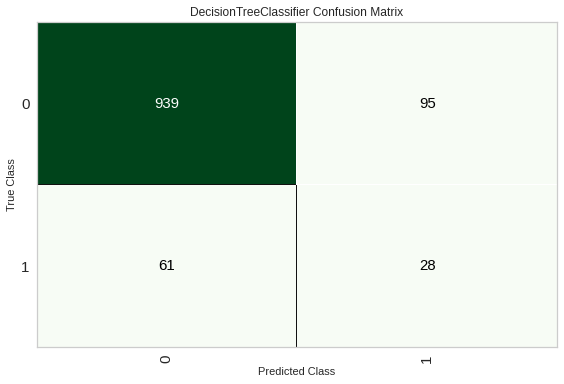

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#Plot Confusion Matrix
plot_model(dt, plot = 'confusion_matrix')

The **predict_model()** function predicts Label and Score (probability of predicted class) using a trained model. When data is None, it predicts label and score on the holdout set.


The **finalize_model()** function trains a given estimator on the entire dataset including the holdout set.

In [23]:
# Predict on holdout set
predict_model(dt)

# Finalize the model by retraining on the entire seen data set
final_model_dt = finalize_model(dt)

predictions_dt = predict_model(final_model_dt, data=data_unseen)
predictions_dt.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8691,0.6517,0.3933,0.2734,0.3226,0.2527,0.2578


INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprec

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9928,0.9842,0.9737,0.9487,0.961,0.9571,0.9572


,target,AGE,Tenure,DirectorshipCount,AVG_IPS,AVG_Weighted_Connection,DOMINANT_SHAREHOLDER_PCT,INSIDERS_OFFICERS_DIRECTORS_HELD_PCT,PRINCIPAL_SHAREHOLDER_PCT,CONTROLLING_SHAREHOLDER_PCT,...,CONTROLLED_VIA_STOCK_PYRAMID,HAS_CORPORATE_PARENT,IVY_indicator,Avg_3rd_connect_17_22,Ttl_controv_17_22,CEO_leav,Chairman_leav,Lead_D_leav,Label,Score
0,0,56,13,2,29.24,2.72,0.0,0.8,0.0,0.0,...,No,No,UNKNOWN,7,1,F,F,F,0,1.0
1,0,66,15,3,8.54,3.90,0.0,0.8,0.0,0.0,...,No,No,False,5,1,F,F,F,0,1.0
2,1,69,16,1,8.15,6.97,0.0,0.8,0.0,0.0,...,No,No,UNKNOWN,2,1,F,T,F,1,1.0
3,0,54,3,3,0.00,2.80,0.0,0.8,0.0,0.0,...,No,No,False,0,1,F,F,F,0,1.0
4,0,75,14,2,1.14,9.10,0.0,0.8,0.0,0.0,...,No,No,False,4,1,F,F,F,0,1.0


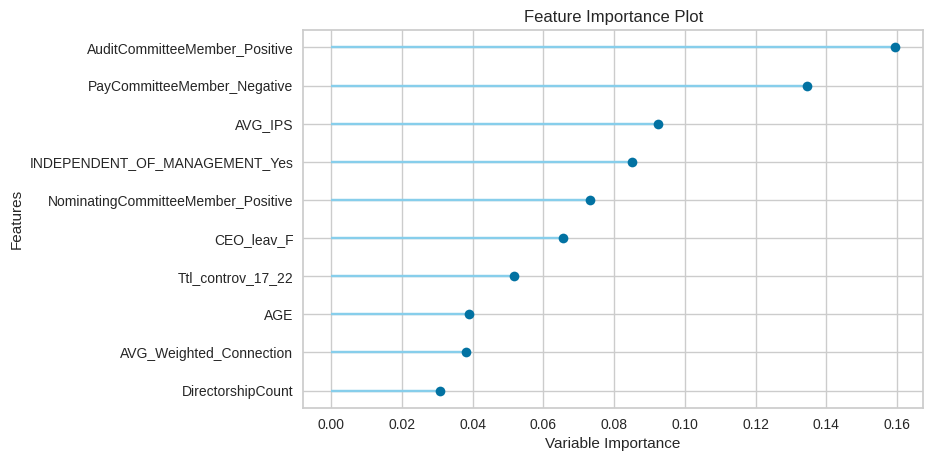

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#Feature Importance - feature shows top 10, feature_all shows all the features
plot_model(dt, plot = 'feature')

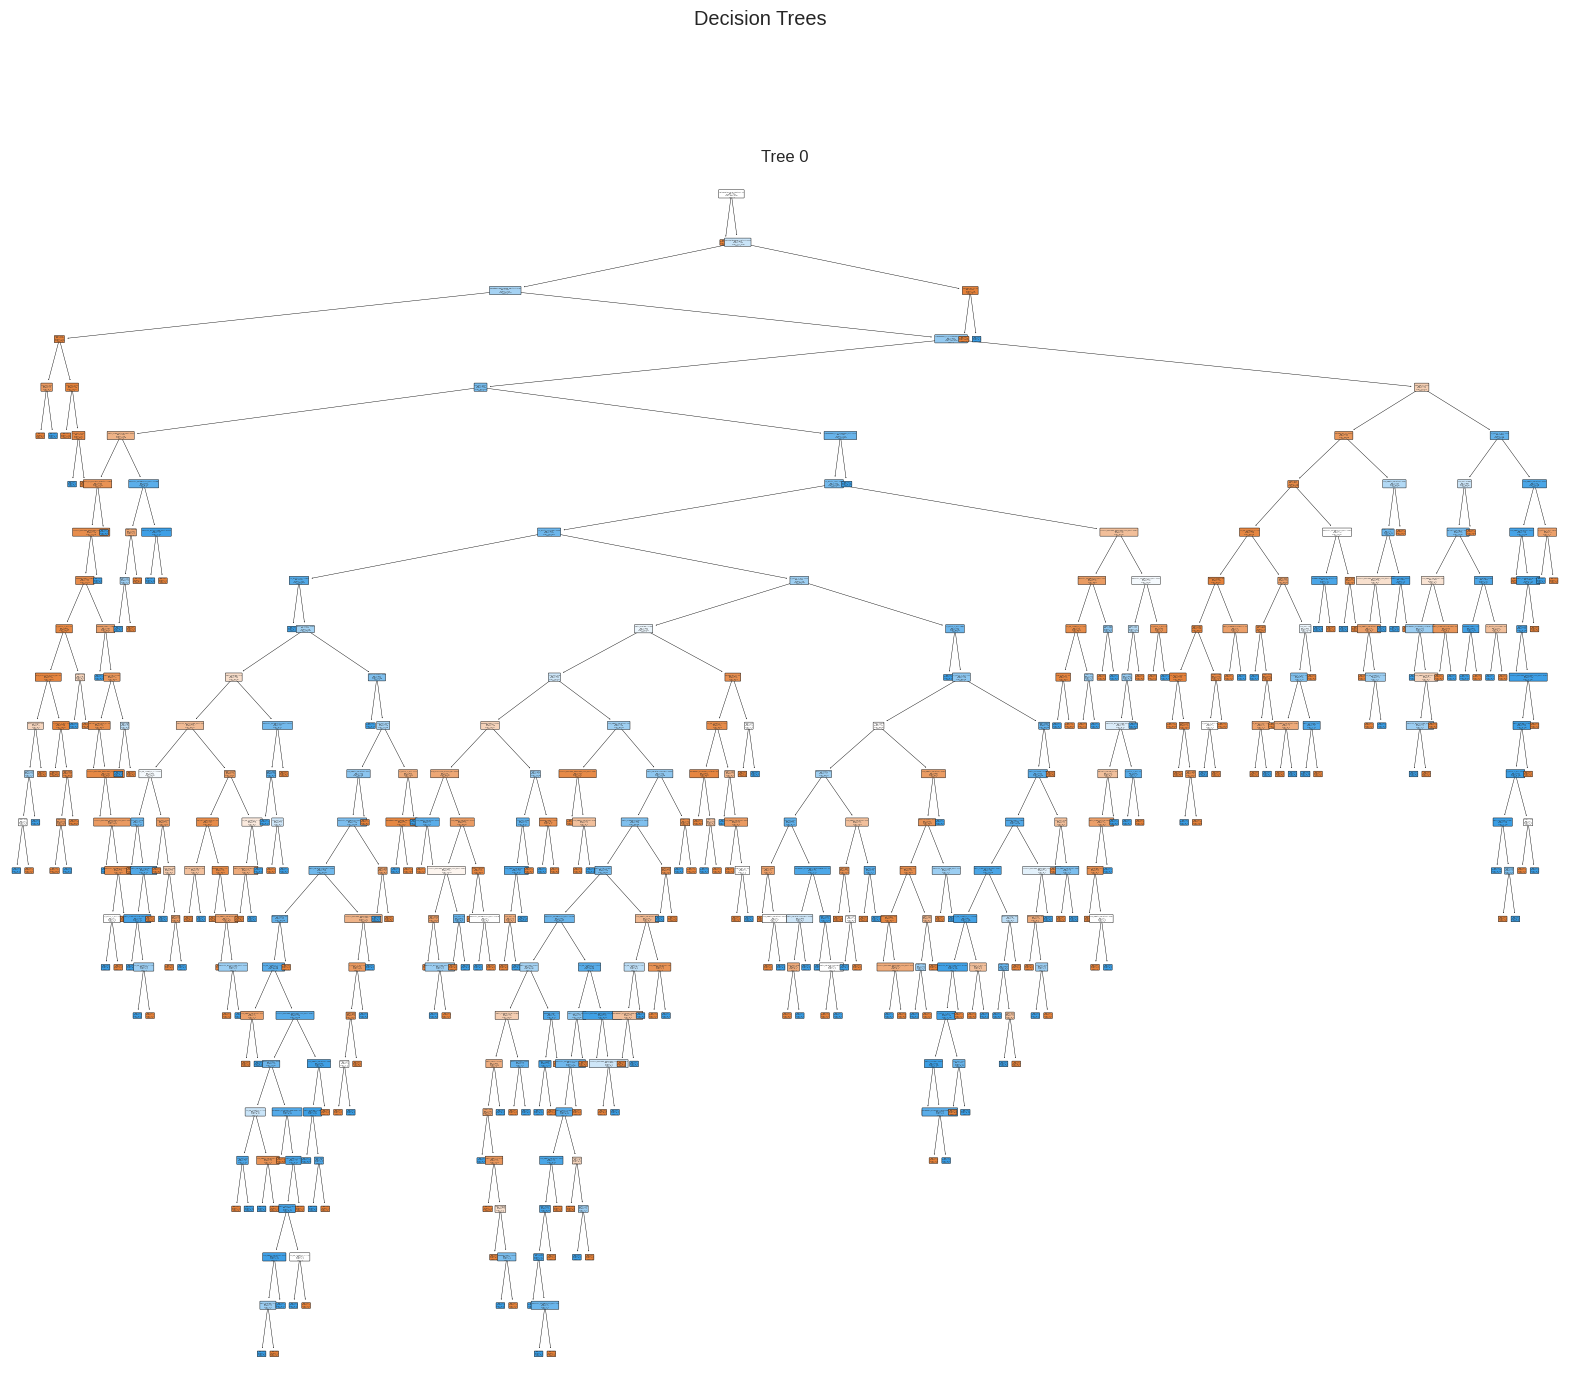

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#Plot Decision Tree
plot_model(dt, plot = 'tree')

The **save_model()** function saves the transformation pipeline and trained model object into the current working directory as a pickle file for later use.

In [ ]:
# Model will be saved as .pkl and can be utilized for serving
save_model(final_model_dt,'Not tuned  Decision Tree Model 2 Dec 2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), model_name=Not tuned  Decision Tree Model 2 Dec 2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['Ttl_controv_17_22',
                                                        

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['Ttl_controv_17_22',
                                                           'Avg_3rd_connect_17_22',
                                                           'DirectorshipCount'],
                                       target='target', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criter

**Logistic Regression Model Pycaret**

In [ ]:
#Create LR Model
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6985,0.8301,0.8261,0.2021,0.3248,0.2139,0.3022
1,0.6870,0.8366,0.9565,0.2136,0.3492,0.2401,0.3578
2,0.6870,0.8438,0.8333,0.2041,0.3279,0.2119,0.3014
3,0.6947,0.8622,0.9583,0.2255,0.3651,0.2545,0.3706
4,0.6641,0.8235,0.8750,0.1981,0.3231,0.2042,0.3044
5,0.7481,0.8817,0.9583,0.2614,0.4107,0.3116,0.4185
6,0.7252,0.8529,0.9583,0.2447,0.3898,0.2856,0.3969
7,0.7011,0.8648,0.9130,0.2165,0.3500,0.2420,0.3483
8,0.7395,0.8354,0.8261,0.2289,0.3585,0.2558,0.3392


INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


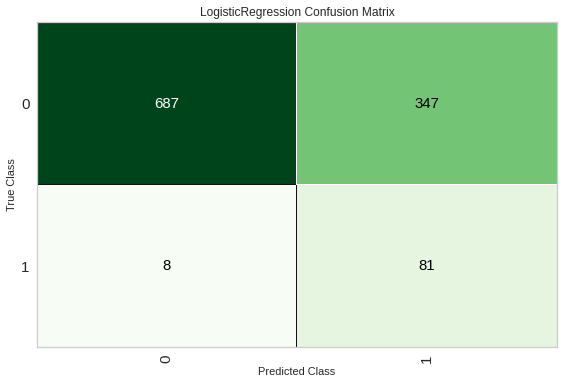

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#Plot Confusion Matrix
plot_model(lr, plot = 'confusion_matrix')

In [ ]:
# Predict on holdout set
predict_model(lr)

# Finalize the model by retraining on the entire seen data set
final_model_lr = finalize_model(lr)

predictions_lr = predict_model(final_model_lr, data=data_unseen)
predictions_lr.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6839,0.8194,0.9101,0.1893,0.3133,0.2096,0.3196


INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_int

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8096,0.8971,0.9474,0.3186,0.4768,0.3937,0.4815


,target,AGE,Tenure,DirectorshipCount,AVG_IPS,AVG_Weighted_Connection,DOMINANT_SHAREHOLDER_PCT,INSIDERS_OFFICERS_DIRECTORS_HELD_PCT,PRINCIPAL_SHAREHOLDER_PCT,CONTROLLING_SHAREHOLDER_PCT,...,CONTROLLED_VIA_STOCK_PYRAMID,HAS_CORPORATE_PARENT,IVY_indicator,Avg_3rd_connect_17_22,Ttl_controv_17_22,CEO_leav,Chairman_leav,Lead_D_leav,Label,Score
0,0,56,13,2,29.24,2.72,0.0,0.8,0.0,0.0,...,No,No,UNKNOWN,7,1,F,F,F,0,0.8735
1,0,66,15,3,8.54,3.90,0.0,0.8,0.0,0.0,...,No,No,False,5,1,F,F,F,1,0.8636
2,1,69,16,1,8.15,6.97,0.0,0.8,0.0,0.0,...,No,No,UNKNOWN,2,1,F,T,F,1,0.9084
3,0,54,3,3,0.00,2.80,0.0,0.8,0.0,0.0,...,No,No,False,0,1,F,F,F,1,0.7078
4,0,75,14,2,1.14,9.10,0.0,0.8,0.0,0.0,...,No,No,False,4,1,F,F,F,1,0.8002


In [ ]:
#Show parameters of Logistic Regression Model
plot_model(lr, plot = 'parameter')

,Parameters
C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


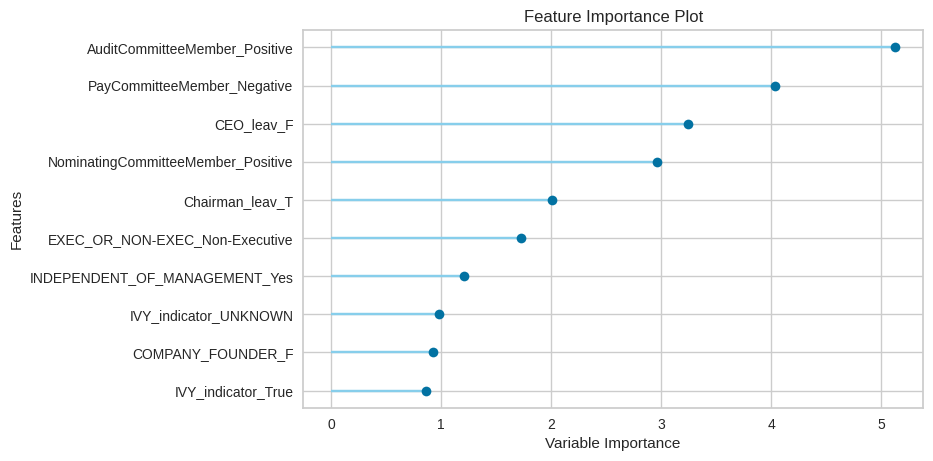

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#Feature Importance - feature shows top 10, feature_all shows all the features
plot_model(lr, plot = 'feature')

The **save_model()** function saves the transformation pipeline and trained model object into the current working directory as a pickle file for later use.

In [ ]:
# Model will be saved as .pkl and can be utilized for serving
save_model(final_model_lr,'Not tuned  Logistic Regression Model 2 Dec 2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=Not tuned  Logistic Regression Model 2 Dec 2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['Ttl_controv_17_22',
                                                          'Avg_3rd_connect_17_22',
                                                          'Director

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['Ttl_controv_17_22',
                                                           'Avg_3rd_connect_17_22',
                                                           'DirectorshipCount'],
                                       target='target', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill...
                                        target_variable='target',
                                        threshold=0.9)),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',

In [ ]:
predictions_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   target                                415 non-null    category
 1   AGE                                   415 non-null    int64   
 2   Tenure                                415 non-null    int64   
 3   DirectorshipCount                     415 non-null    int64   
 4   AVG_IPS                               415 non-null    float64 
 5   AVG_Weighted_Connection               415 non-null    float64 
 6   DOMINANT_SHAREHOLDER_PCT              415 non-null    float64 
 7   INSIDERS_OFFICERS_DIRECTORS_HELD_PCT  415 non-null    float64 
 8   PRINCIPAL_SHAREHOLDER_PCT             415 non-null    float64 
 9   CONTROLLING_SHAREHOLDER_PCT           415 non-null    float64 
 10  GENDER                                415 non-null    object  
 11  COMPAN

**Tuned Logistic Regression Model**

No much difference

The **tune_model()** function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [ ]:
#Tune Created RF Model
lr_tuned = tune_model(lr, optimize='Precision')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6947,0.8114,0.8261,0.2000,0.3220,0.2104,0.2991
1,0.6832,0.8355,0.9565,0.2115,0.3465,0.2367,0.3548
2,0.7061,0.8267,0.7917,0.2088,0.3304,0.2169,0.2964
3,0.7061,0.8708,0.9583,0.2323,0.3740,0.2657,0.3802
4,0.6832,0.8095,1.0000,0.2243,0.3664,0.2549,0.3822
5,0.7595,0.8806,0.9583,0.2706,0.4220,0.3257,0.4300
6,0.7366,0.8526,1.0000,0.2581,0.4103,0.3097,0.4281
7,0.7088,0.8602,0.8696,0.2151,0.3448,0.2370,0.3332
8,0.7471,0.8261,0.7826,0.2278,0.3529,0.2507,0.3247


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 9
INFO:logs:LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


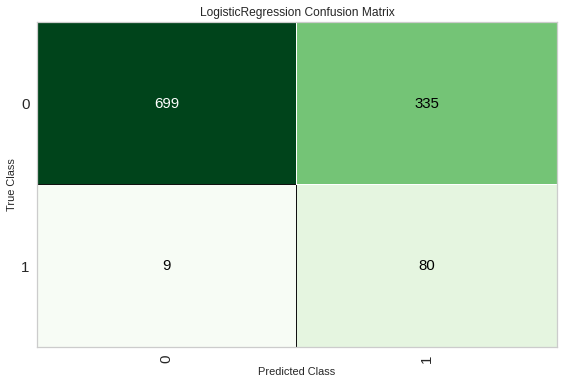

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#Plot Confusion Matrix
plot_model(lr_tuned, plot = 'confusion_matrix')

In [ ]:
# Predict on holdout set
predict_model(lr_tuned)

# Finalize the model by retraining on the entire seen data set
final_model_lr_tuned = finalize_model(lr_tuned)

predictions_lr_tuned = predict_model(final_model_lr_tuned, data=data_unseen)
predictions_lr_tuned.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6937,0.8284,0.8989,0.1928,0.3175,0.215,0.3217


INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LogisticRegression(C=8.866, class_weight='balanc

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8554,0.9199,0.9737,0.3854,0.5522,0.4846,0.5589


,target,AGE,Tenure,DirectorshipCount,AVG_IPS,AVG_Weighted_Connection,DOMINANT_SHAREHOLDER_PCT,INSIDERS_OFFICERS_DIRECTORS_HELD_PCT,PRINCIPAL_SHAREHOLDER_PCT,CONTROLLING_SHAREHOLDER_PCT,...,HAS_CORPORATE_PARENT,OWNERSHIP_CATEGORY,IVY_indicator,Avg_3rd_connect_17_22,Ttl_controv_17_22,CEO_leav,Chairman_leav,Lead_D_leav,Label,Score
0,0,56,13,2,29.24,2.72,0.0,0.8,0.0,0.0,...,No,Widely Held,UNKNOWN,7,1,F,F,F,0,0.8925
1,0,66,15,3,8.54,3.90,0.0,0.8,0.0,0.0,...,No,Widely Held,False,5,1,F,F,F,1,0.8858
2,1,69,16,1,8.15,6.97,0.0,0.8,0.0,0.0,...,No,Widely Held,UNKNOWN,2,1,F,T,F,1,0.9201
3,0,54,3,3,0.00,2.80,0.0,0.8,0.0,0.0,...,No,Widely Held,False,0,1,F,F,F,1,0.7251
4,0,75,14,2,1.14,9.10,0.0,0.8,0.0,0.0,...,No,Widely Held,False,4,1,F,F,F,1,0.8190


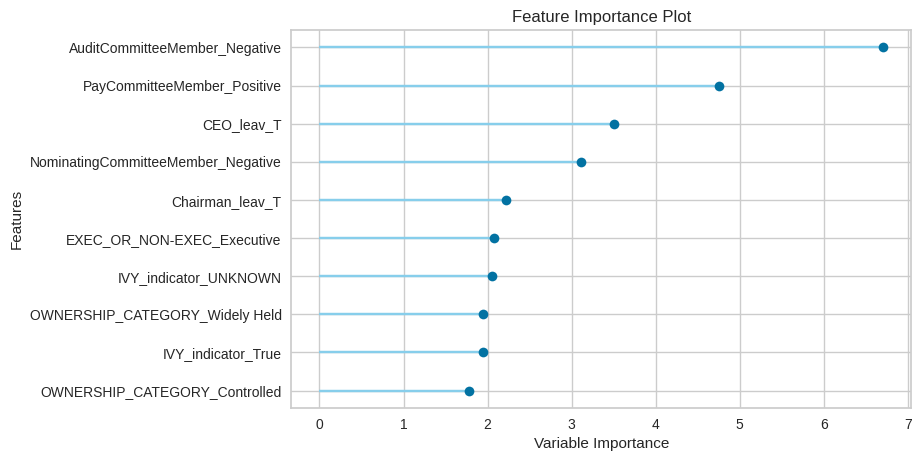

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#Feature Importance - feature shows top 10, feature_all shows all the features
plot_model(lr_tuned, plot = 'feature')

The **save_model()** function saves the transformation pipeline and trained model object into the current working directory as a pickle file for later use.

In [ ]:
# Model will be saved as .pkl and can be utilized for serving
save_model(final_model_lr_tuned,'Tuned  Logistic Regression Model 2 Dec 2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=Tuned  Logistic Regression Model 2 Dec 2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['Ttl_controv_17_22',
                                                          'Avg_3rd_connect_17_22',
                                                          'Dire

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['Ttl_controv_17_22',
                                                           'Avg_3rd_connect_17_22',
                                                           'DirectorshipCount'],
                                       target='target', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill...
                                        target_variable='target',
                                        threshold=0.9)),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',